# VLMap Creation

## Download the data and install dependencies

In [ ]:
%cd /content/
!gdown 1wjuiVcO92Rqer5gLk-X7hINfe4PCMQmu
!unzip 5LpN3gDmAk7_1.zip
!git clone https://github.com/Tom-Huang/vlmaps.git
!ls

In [42]:
!pip install git+https://github.com/openai/CLIP.git
!pip install torch==1.9.1+cu111 torchvision==0.10.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
!pip install torchmetrics==0.5.1
!pip install setuptools==59.5.0
!pip install git+https://github.com/zhanghang1989/PyTorch-Encoding/
!pip install pytorch-lightning==1.4.9
!pip install opencv-python
!pip install imageio
!pip install ftfy regex tqdm
!pip install altair
!pip install --upgrade protobuf
!pip install timm
!pip install tensorboardX
!pip install matplotlib
!pip install test-tube
!pip install wandb
!pip install h5py

# install habitat
!pip install cmake==3.14.4
!pip install tensorflow-gpu==2.9.1
!conda install habitat-sim -c conda-forge -c aihabitat
%cd ~
!git clone https://github.com/facebookresearch/habitat-lab.git
!pip install gym==0.22.0
%cd habitat-lab
!git checkout bfba72f47800819d858a6859b14cfa26122c2762
!python setup.py develop --all

!pip install openai==0.8.0
!pip install grad-cam


^C
Traceback (most recent call last):
  File "/home/huang/anaconda3/envs/lseg_map/bin/pip", line 11, in <module>
    sys.exit(main())
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/pip/_internal/cli/main.py", line 68, in main
    command = create_command(cmd_name, isolated=("--isolated" in cmd_args))
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/pip/_internal/commands/__init__.py", line 109, in create_command
    module = importlib.import_module(module_path)
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/importlib/__init__.py", line 127, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 1014, in _gcd_import
  File "<frozen importlib._bootstrap>", line 991, in _find_and_load
  File "<frozen importlib._bootstrap>", line 975, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 671, in _load_unlocked
  File "<frozen importlib._bootstr

## Download LSeg checkpoint

In [ ]:
cd /content/vlmaps/lseg
!mkdir checkpoints
%cd checkpoints
!gdown 1ayk6NXURI_vIPlym16f_RG3ffxBWHxvb
!ls
%cd /content/vlmaps

In [41]:
from examples import clip_mapping_lseg_from_scratch_batch

## VLMap Creation
It takes around 20 minutes to build a VLMap with around 1000 RGBD frames. We also provide a pre-built VLMap. Skip to the Landmark Indexing part of the code to directly try our map.

In [1]:
# setup parameters
cs = 0.05 # meters per cell size
gs = 1000 # map resolution
camera_height = 1.5 # camera ground distance
depth_sample_rate = 100 # depth pixels subsample rate
data_dir = "/content/5LpN3gDmAk7_1/" # data where rgb, depth, pose are loaded and map are saved

In [2]:
from examples.clip_mapping_lseg_from_scratch_batch import create_lseg_map_batch
create_lseg_map_batch(data_dir, camera_height=camera_height, cs=cs, gs=gs, depth_sample_rate=depth_sample_rate)

__file__:  /home/huang/hcg/projects/vln/relevant_code/vlmaps/examples/context.py
imported path: /home/huang/hcg/projects/vln/relevant_code/vlmaps
cuda
Loading CLIP model...
Creating LSegEncNet model...
Creating time 8.216779708862305s.
Loading pretrained model...
Loading time 1.3950817584991455s.
Filtering pretrained model...
Assigning pretrained model parameters to model...
loading scene /home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/color_top_down_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/grid_1_gt.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/grid_lseg_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/weight_lseg_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/obstacles.npy is saved.
empty map saved
first image read


  0%|          | 0/1159 [00:00<?, ?it/s]/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/torch/nn/functional.py:3609: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(
100%|██████████| 1159/1159 [22:04<00:00,  1.14s/it]

/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/color_top_down_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/grid_1_gt.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/grid_lseg_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/weight_lseg_1.npy is saved.
/home/huang/hcg/projects/vln/data/clip_mapping/sim_new/5LpN3gDmAk7_1/map/obstacles.npy is saved.


100%|██████████| 1159/1159 [22:05<00:00,  1.14s/it]


# Landmark Indexing

## Load packages

In [3]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from utils.clip_mapping_utils import *
from utils.clip_utils import *
from utils.mp3dcat import mp3dcat
import clip

## Setup Load Paths

In [4]:
use_self_built_map = True
map_save_dir = os.path.join(data_dir, "map_correct")
if use_self_built_map:
    map_save_dir = os.path.join(data_dir, "map")
os.makedirs(map_save_dir, exist_ok=True)

color_top_down_save_path = os.path.join(map_save_dir, f"color_top_down_1.npy")
grid_save_path = os.path.join(map_save_dir, f"grid_lseg_1.npy")
obstacles_save_path = os.path.join(map_save_dir, "obstacles.npy")



## Show Obstacle Map

[0 1]


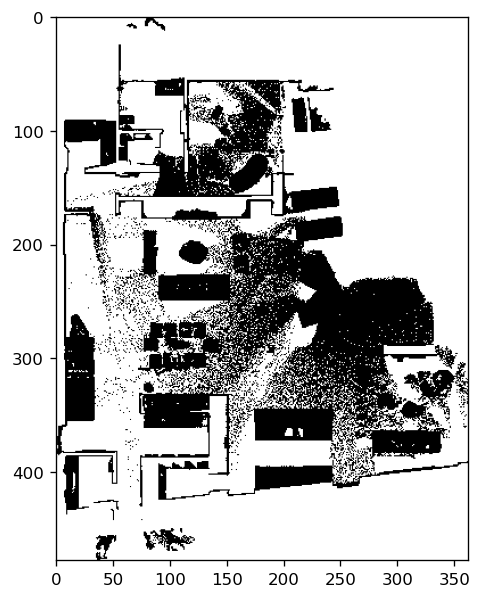

In [5]:
obstacles = load_map(obstacles_save_path)
x_indices, y_indices = np.where(obstacles == 0)

xmin = np.min(x_indices)
xmax = np.max(x_indices)
ymin = np.min(y_indices)
ymax = np.max(y_indices)

print(np.unique(obstacles))
obstacles_pil = Image.fromarray(obstacles[xmin:xmax+1, ymin:ymax+1])
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(obstacles_pil, cmap='gray')
plt.show()

## Show Top-Down Color Map

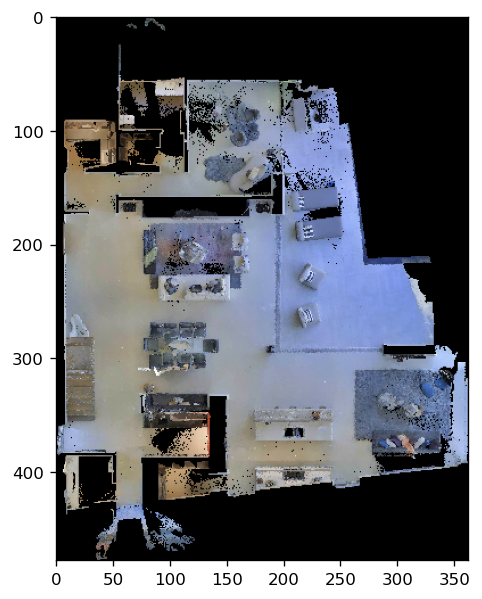

In [6]:
color_top_down = load_map(color_top_down_save_path)
color_top_down = color_top_down[xmin:xmax+1, ymin:ymax+1]
color_top_down_pil = Image.fromarray(color_top_down)
plt.figure(figsize=(8, 6), dpi=120)
plt.imshow(color_top_down_pil)
plt.show()


## Show Landmark Indexing Results

In [7]:
device = "cuda" if torch.cuda.is_available() else "cpu"
clip_version = "ViT-B/32"
clip_feat_dim = {'RN50': 1024, 'RN101': 512, 'RN50x4': 640, 'RN50x16': 768,
                'RN50x64': 1024, 'ViT-B/32': 512, 'ViT-B/16': 512, 'ViT-L/14': 768}[clip_version]
clip_model, preprocess = clip.load(clip_version)  # clip.available_models()
clip_model.to(device).eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(32, 32), stride=(32, 32), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [8]:
grid = load_map(grid_save_path)
grid = grid[xmin:xmax+1, ymin:ymax+1]

(478, 363)


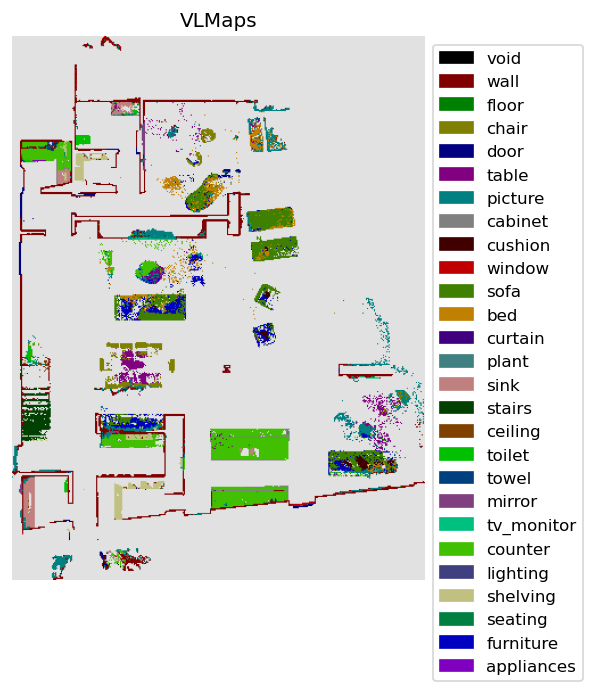

In [9]:
no_map_mask = obstacles[xmin:xmax+1, ymin:ymax+1] > 0
obstacles_rgb = np.repeat(obstacles[xmin:xmax+1, ymin:ymax+1, None], 3, axis=2)
print(no_map_mask.shape)

lang = mp3dcat 
text_feats = get_text_feats(lang, clip_model, clip_feat_dim)

map_feats = grid.reshape((-1, grid.shape[-1]))
scores_list = map_feats @ text_feats.T

predicts = np.argmax(scores_list, axis=1)
predicts = predicts.reshape((xmax - xmin + 1, ymax - ymin + 1))
floor_mask = predicts == 2

new_pallete = get_new_pallete(len(lang))
mask, patches = get_new_mask_pallete(predicts, new_pallete, out_label_flag=True, labels=lang)
seg = mask.convert("RGBA")
seg = np.array(seg)
seg[no_map_mask] = [225, 225, 225, 255]
seg[floor_mask] = [225, 225, 225, 255]
seg = Image.fromarray(seg)
plt.figure(figsize=(10, 6), dpi=120)
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1., 1), prop={'size': 10})
plt.axis('off')
plt.title("VLMaps")
plt.imshow(seg)
plt.show()

## Open-Vocabulary Landmark Indexing

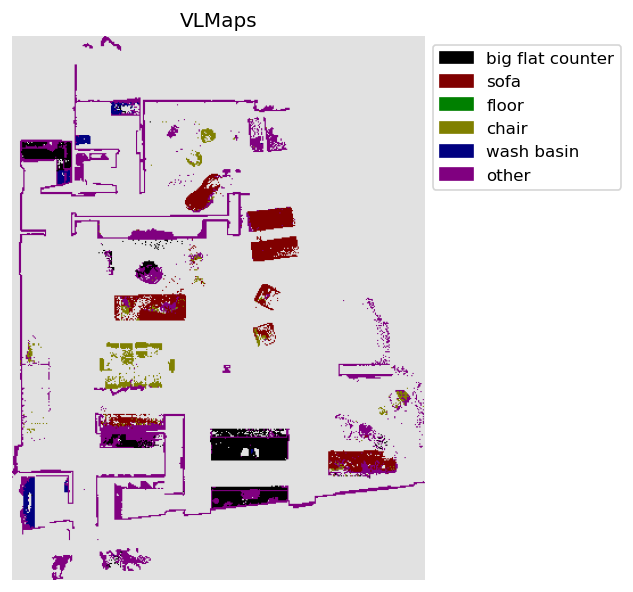

In [14]:
lang = ["big flat counter", "sofa", "floor", "chair", "wash basin", "other"] 
text_feats = get_text_feats(lang, clip_model, clip_feat_dim)

map_feats = grid.reshape((-1, grid.shape[-1]))
scores_list = map_feats @ text_feats.T

predicts = np.argmax(scores_list, axis=1)
predicts = predicts.reshape((xmax - xmin + 1, ymax - ymin + 1))
floor_mask = predicts == 2

new_pallete = get_new_pallete(len(lang))
mask, patches = get_new_mask_pallete(predicts, new_pallete, out_label_flag=True, labels=lang)
seg = mask.convert("RGBA")
seg = np.array(seg)
seg[no_map_mask] = [225, 225, 225, 255]
seg[floor_mask] = [225, 225, 225, 255]
seg = Image.fromarray(seg)
plt.figure(figsize=(10, 6), dpi=120)
plt.legend(handles=patches, loc='upper left', bbox_to_anchor=(1., 1), prop={'size': 10})
plt.axis('off')
plt.title("VLMaps")
plt.imshow(seg)
plt.show()

Traceback (most recent call last):
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/matplotlib/animation.py", line 951, in _start
    self._init_draw()
  File "/home/huang/anaconda3/envs/lseg_map/lib/python3.8/site-packages/matplotlib/animation.py", line 1525, in _init_draw
    artist.set_visible(False)
AttributeError: 'PngImageFile' object has no attribute 'set_visible'


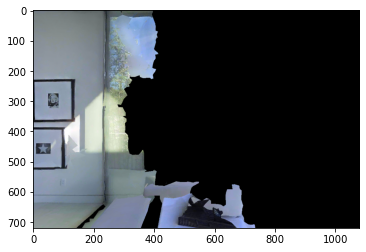

In [40]:
import cv2
import time
import matplotlib.animation
from IPython.display import Video
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline
rgb_dir = os.path.join(data_dir, "rgb")
rgb_list = os.listdir(rgb_dir)
rgb_list = sorted([os.path.join(rgb_dir, x) for x in rgb_list], key=lambda x: int(x.split("/")[-1].split(".")[0].split("_")[-1]))
fig, ax = plt.subplots()
ax = fig.gca()
imgs = []
for i, rgb_path in enumerate(rgb_list):
    if i > 5:
        break
    rgb = Image.open(rgb_path)
    if i == 0:
        plt.imshow(rgb)
    imgs.append([rgb])

animation.ArtistAnimation(fig, imgs, interval=50, blit=True,
                                repeat_delay=1000)



In [43]:
from base64 import b64encode
def play(filename):
    html = ''
    video = open(filename,'rb').read()
    src = 'data:video/mp4;base64,' + b64encode(video).decode()
    html += '<video width=1000 controls autoplay loop><source src="%s" type="video/mp4"></video>' % src 
    return HTML(html)
Video("/home/huang/hcg/projects/vln/relevant_code/vlmaps/tmp.avi", embed=True)